In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class gradiente_descendente():
    '''
    função a ser minimizada:
    np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 2*x2 - 0.1) + np.exp(-x1 - 0.2)
    
    type_alpha = ['constant', 'backtracking', 'exact_line']
    '''
    
    def __init__(self, alpha=0.001, tol = 1e-6, rho=0.5, c=0.1, epochs=100, type_alpha = 'constant'):
        self.epochs = epochs # épocas
        self.alpha = alpha # taxa de aprendizado
        self.rho = rho # hiperparâmetro do backtraking
        self.c = c # hiperparâmetro do backtraking
        self.type_alpha = type_alpha # tipo de taxa de aprendizado
        self.tol = tol # valor para condição de parada
        
    def function(self, x):
        # função a ser minizada
        return np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-2*x[1]-0.1)+np.exp(-x[0]-0.2)
    
    def gradiente(self, x):
        # derivada parcial da função a ser minimizada
        return np.array([np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-2*x[1]-0.1)-np.exp(-x[0]-0.2), 
                         3*np.exp(x[0]+3*x[1]-0.1)-2*np.exp(x[0]-2*x[1]-0.1)])
    
    def exact_line_search(self, ponto, grad):
        '''
        busca em linha exata da taxa de aprendizado.
        é utilizado o algoritmo da descida da encosta para realizar a busca
        do t ótimo.
        '''
        t = 1
        s = 0.0001
        x = self.function([ponto[0] + t*grad[0], ponto[1] + t*grad[1]])
        
        '''neste laço, é verificado se o ponto mais a esquerda de x leva a um valor menor de f.
        o mesmo é feito para o ponto mais a direita.
        o ponto que reduzir o valor da função é escolhido e t é atualizado.'''
        for i in range(1000000):
            if self.function([ponto[0] + (t+s)*grad[0], ponto[1] + (t+s)*grad[1]]) < x:
                x = self.function([ponto[0] + (t+s)*grad[0], ponto[1] + (t+s)*grad[1]])
                t += s

            elif self.function([ponto[0] + (t-s)*grad[0], ponto[1] + (t-s)*grad[1]]) < x:
                x = self.function([ponto[0] + (t-s)*grad[0], ponto[1] + (t-s)*grad[1]])
                t -= s
            else:
                break
        return t

    def fit(self, x0):
        # x guardará os pontos [x1, x2] percorridos no processo de minimização
        x = np.vstack((x0 + 2 * self.tol * np.ones(x0.shape),x0)).transpose() 
        i = 1 # variável de iteração do laço
        
        # condição de parada se ||xi - xj|| < tol e epocas chegar no máximo
        while (np.linalg.norm(x[:,i]-x[:,i-1]) > self.tol ) and ( i < self.epochs ):
            
            p = -self.gradiente(x[:,i]) # passo de busca
            
            # busca backtracking da taxa de aprendizado
            if self.type_alpha == 'backtracking':
                self.alpha = 1 
                xnew = x[:,i] + self.alpha * p # atualiza ponto x
                
                # enquanto f(xnew) > fx + alpha * c * grad * f(x)
                while (self.function(xnew) >= self.function(x[:,i]) + self.alpha*self.c*np.dot(p, self.gradiente(x[:,i]))):
                    self.alpha = self.alpha * self.rho # atualiza alpha
                    xnew = x[:,i] + self.alpha * p # atualiza ponto x
            
            # taxa de aprendizado constante
            elif self.type_alpha == 'constant': 
                xnew = x[:,i] + self.alpha * p # atualiza ponto x
            
            # busca em linha exata da taxa de aprendizado
            elif self.type_alpha == 'exact_line':
                # busca alpha ótimo
                self.alpha = self.exact_line_search(x[:,i], p)
                xnew = x[:,i] + self.alpha * p #atualiza ponto x
            
            # insere o novo ponto x no vetor de pontos percorridos
            x = np.concatenate((x, xnew.reshape((len(x0),1))), axis=1)
            i += 1 #itera a variavel de laço
                
        return x[:,1:] # retorna o vetor de pontos percorridos

In [9]:
clf = gradiente_descendente(alpha=0.001, 
                            tol = 1e-6, 
                            rho=0.5, 
                            c=0.1, 
                            epochs=100, 
                            type_alpha = 'exact_line')

In [10]:
'''
com backtracking: 20 passos
[-0.38650597, -0.0810932 ]

com exact line: 12
[-0.38650588, -0.08109278]
'''

'\ncom backtracking: 20 passos\n[-0.38650597, -0.0810932 ]\n'

In [11]:
xbt = clf.fit(np.array([-1.,1])) 

In [14]:
xbt

array([[-1.        , -1.21175393, -0.4134571 , -0.40447767, -0.38812865,
        -0.38757027, -0.38660237, -0.38656909, -0.38651158, -0.3865096 ,
        -0.38650591, -0.38650588],
       [ 1.        ,  0.06152351, -0.11923768, -0.07969598, -0.08344376,
        -0.08101159, -0.0812335 , -0.08108818, -0.08110138, -0.08109272,
        -0.08109361, -0.08109278]])

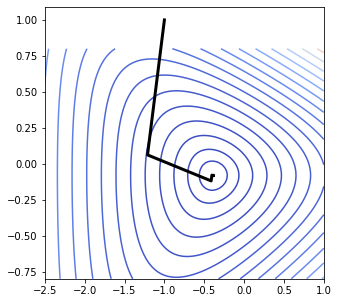

In [15]:
xvals = np.array([[np.linspace(-4,-0.5,20)], [np.zeros(20)]])
yvals = list(reversed(clf.function(xvals)[0]))

xx = np.linspace(-2.5,1,100)
yy = np.linspace(-0.8,0.8,100)
X, Y = np.meshgrid(xx, yy)

Z = clf.function(np.dstack((X,Y)).reshape((X.size, 2)).transpose())

Z = Z.reshape(X.shape)
cmap = plt.cm.get_cmap("coolwarm")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.contour(X, Y, Z, yvals, cmap = cmap)
ax.plot(xbt[0,:], xbt[1,:], color='black', linewidth=3)
plt.show()

In [ ]:
def exact_line_search(function, ponto, grad): # grad is the gradiente vector
        t = 1 # alpha learning rate
        s = 0.0001 # search space size for left and right of t
        x = function([ponto[0] + t*grad[0], ponto[1] + t*grad[1]]) # initial point

        for i in range(1000000):
            if function([ponto[0] + (t+s)*grad[0], ponto[1] + (t+s)*grad[1]]) < x:
                x = function([ponto[0] + (t+s)*grad[0], ponto[1] + (t+s)*grad[1]])
                t += s

            elif function([ponto[0] + (t-s)*grad[0], ponto[1] + (t-s)*grad[1]]) < x:
                x = function([ponto[0] + (t-s)*grad[0], ponto[1] + (t-s)*grad[1]])
                t -= s
            else:
                break
            
            if t < 0: # learning rate must be > 0
                t += s
                break
        return t